# 5. Multilayer Perceptrons

Neste capítulo, apresentaremos sua primeira rede verdadeiramente profunda . As redes profundas mais simples são chamadas de perceptrons multicamadas e consistem em múltiplas camadas de neurônios, cada uma totalmente conectada às da camada inferior (da qual recebem entrada) e às superiores (que, por sua vez, influenciam).

Quando treinamos modelos de alta capacidade, corremos o risco de overfitting. Assim, revisitaremos a regularização e a generalização para redes profundas.



# 5.1. Perceptrons multicamadas

In [1]:
%matplotlib inline
import torch
from d2l import torch as d2l

# 5.1.1. Camadas ocultas

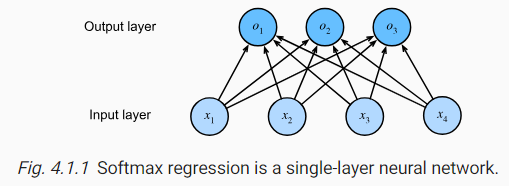

Se nossos rótulos estivessem realmente relacionados aos dados de entrada por uma simples transformação afim, então esta abordagem seria suficiente. No entanto, a linearidade (em transformações afins) é uma suposição forte .

# 5.1.1.1. Limitações dos modelos lineares

Embora monotónica, esta relação provavelmente não está linearmente associada à probabilidade de reembolso. Um aumento na renda de US$ 0 para US$ 50.000 provavelmente corresponde a um aumento maior na probabilidade de reembolso do que um aumento de US$ 1 milhão para US$ 1,05 milhão. Uma maneira de lidar com isso pode ser pós-processar nosso resultado de modo que a linearidade se torne mais plausível, usando o mapa logístico (e, portanto, o logaritmo da probabilidade do resultado).

Observe que podemos facilmente encontrar exemplos que violam a monotonicidade. Digamos, por exemplo, que queremos prever a saúde em função da temperatura corporal. Para indivíduos com temperatura corporal normal acima de 37°C (98,6°F), temperaturas mais altas indicam maior risco. No entanto, se a temperatura corporal descer abaixo dos 37°C, temperaturas mais baixas indicam maior risco! Novamente, poderíamos resolver o problema com algum pré-processamento inteligente, como usar a distância de 37°C como um recurso.

Embora possa existir uma representação dos nossos dados que leve em conta as interações relevantes entre as nossas características, sobre as quais um modelo linear seria adequado, simplesmente não sabemos como calculá-lo manualmente. Com redes neurais profundas, usamos dados observacionais para aprender em conjunto uma representação por meio de camadas ocultas e um preditor linear que atua sobre essa representação.

Também é algo que o cérebro resolve naturalmente. Afinal, os neurônios alimentam outros neurônios que, por sua vez, alimentam novamente outros neurônios ( Ramón y Cajal e Azoulay, 1894 ) . Conseqüentemente, temos uma sequência de transformações relativamente simples.

# 5.1.1.2. Incorporando camadas ocultas

Perceptron multicamadas, frequentemente abreviado como MLP (Multi Layer Perceptron).

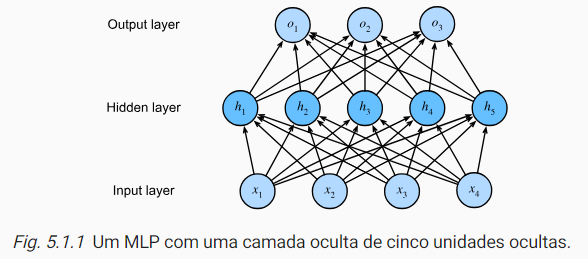

Este MLP possui quatro entradas, três saídas e sua camada oculta contém cinco unidades ocultas. 

Como a camada de entrada não envolve nenhum cálculo, a produção de saídas com esta rede requer a implementação de cálculos para as camadas oculta e de saída; portanto, o número de camadas neste MLP é dois. Observe que ambas as camadas estão totalmente conectadas. 

Cada entrada influencia cada neurônio na camada oculta e cada um deles, por sua vez, influencia cada neurônio na camada de saída. 



# 5.1.1.3. De Linear a Não Linear

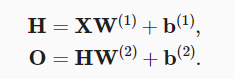


Para concretizar o potencial das arquiteturas multicamadas, precisamos de mais um ingrediente chave: uma função de ativação não linear 
a ser aplicado a cada unidade oculta após a transformação afim. Por exemplo, uma escolha popular é a função de ativação ReLU (unidade linear retificada)

Em geral, com funções de ativação implementadas, não é mais possível reduzir nosso MLP a um modelo linear:

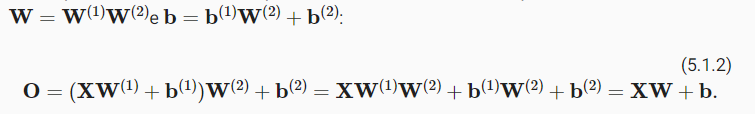

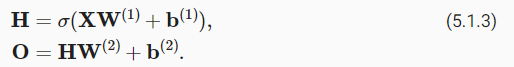

Frequentemente, as funções de ativação que usamos não se aplicam apenas a linhas, mas também a elementos. Isso significa que após calcular a porção linear da camada, podemos calcular cada ativação sem olhar os valores obtidos pelas outras unidades ocultas.

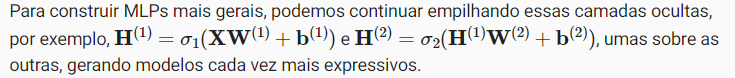

# 5.1.1.4. Aproximadores Universais

Podemos aproximar muitas funções de forma muito mais compacta usando redes mais profundas (em vez de mais amplas) ( Simonyan e Zisserman, 2014 ) .

# 5.1.2. Funções de ativação

As funções de ativação decidem se um neurônio deve ser ativado ou não, calculando a soma ponderada e adicionando viés a ele.

Eles são operadores diferenciáveis para transformar sinais de entrada em saídas, enquanto a maioria deles adiciona não linearidade.



# 5.1.2.1. Função ReLU

A escolha mais popular, devido à simplicidade de implementação e ao seu bom desempenho em uma variedade de tarefas preditivas, é a unidade linear retificada ( ReLU ).

ReLU fornece uma transformação não linear muito simples. Dado um elemento x, a função é definida como o máximo desse elemento e 0:

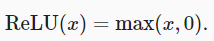

Informalmente, a função ReLU retém apenas os elementos positivos e descarta todos os elementos negativos, definindo as ativações correspondentes como 0.
A função de ativação é linear por partes.

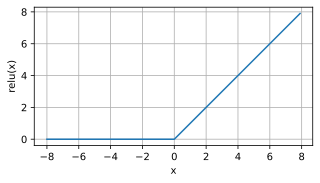

In [11]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.relu(x)
d2l.plot(x.detach(), y.detach(), 'x', 'relu(x)', figsize=(5, 2.5))

Para x>=0, y==x.

Quando a entrada é negativa, a derivada da função ReLU é 0, e quando a entrada é positiva, a derivada da função ReLU é 1. Observe que a função ReLU não é diferenciável quando a entrada assume valor precisamente igual a 0. Em Nesses casos, adotamos como padrão a derivada do lado esquerdo e dizemos que a derivada é 0 quando a entrada é 0.

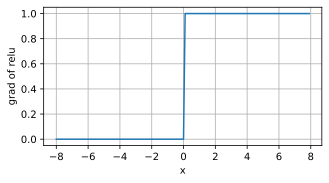

In [12]:
y.backward(torch.ones_like(x), retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of relu', figsize=(5, 2.5))

A razão para usar ReLU é que suas derivadas são particularmente bem comportadas: ou desaparecem ou simplesmente deixam passar o argumento.


# 5.1.2.2. Função Sigmóide

A função sigmóide transforma as entradas cujos valores estão no domínio R, para saídas que estão no intervalo (0, 1).

Por esse motivo, o sigmóide é frequentemente chamado de função de esmagamento: ele comprime qualquer entrada no intervalo (-inf, inf) para algum valor no intervalo (0, 1):

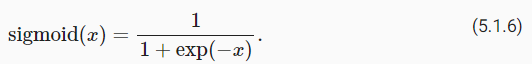

Os sigmóides ainda são amplamente utilizados como funções de ativação nas unidades de saída quando queremos interpretar as saídas como probabilidades para problemas de classificação binária: você pode pensar no sigmóide como um caso especial do softmax.

No entanto, o sigmóide foi amplamente substituído pelo ReLU, mais simples e mais facilmente treinável, para a maior parte do uso em camadas ocultas.

Abaixo, traçamos a função sigmóide. Observe que quando a entrada está próxima de 0, a função sigmóide se aproxima de uma transformação linear.

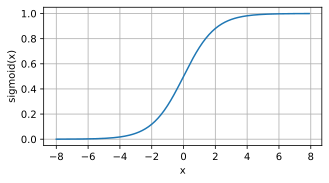

In [13]:
y = torch.sigmoid(x)
d2l.plot(x.detach(), y.detach(), 'x', 'sigmoid(x)', figsize=(5, 2.5))

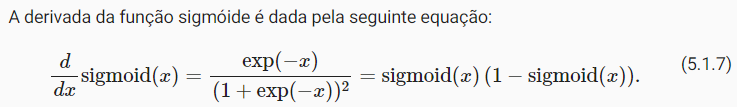

A derivada da função sigmóide é plotada abaixo. Observe que quando a entrada é 0, a derivada da função sigmóide atinge no máximo 0,25. À medida que a entrada diverge de 0 em qualquer direção, a derivada se aproxima de 0.

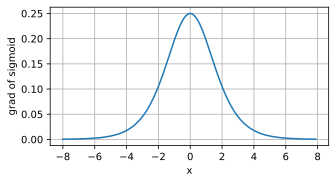

In [14]:
# Clear out previous gradients
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of sigmoid', figsize=(5, 2.5))

# 5.1.2.3. Função Tanh

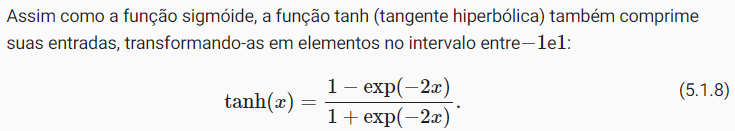

Traçamos a função tanh abaixo. Observe que conforme a entrada se aproxima de 0, a função tanh se aproxima de uma transformação linear. Embora a forma da função seja semelhante à da função sigmóide, a função tanh exibe simetria pontual em relação à origem do sistema de coordenadas



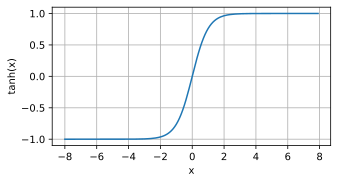

In [15]:
y = torch.tanh(x)
d2l.plot(x.detach(), y.detach(), 'x', 'tanh(x)', figsize=(5, 2.5))

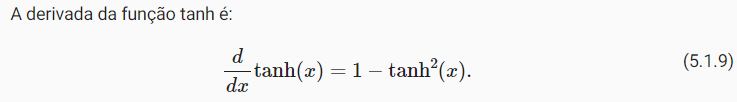

À medida que a entrada se aproxima de 0, a derivada da função tanh se aproxima de um máximo de 1. E como vimos com a função sigmóide, à medida que a entrada se afasta de 0 em qualquer direção, a derivada da função tanh se aproxima de 0.

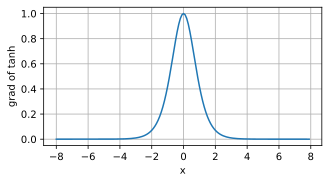

In [16]:
# Clear out previous gradients
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of tanh', figsize=(5, 2.5))

# 5.1.3. Resumo e Discussão

Agora sabemos como incorporar não linearidades para construir arquiteturas expressivas de redes neurais multicamadas. Como observação lateral, seu conhecimento já o coloca no comando de um kit de ferramentas semelhante ao de um profissional por volta de 1990.

Um benefício secundário é que ReLU é significativamente mais passível de otimização do que a função sigmóide ou tanh. Pode-se argumentar que esta foi uma das principais inovações que ajudou ao ressurgimento da aprendizagem profunda na última década.